In [1]:
import praw
import time
import datetime
from datetime import datetime, timedelta

In [2]:
import praw
import time
import datetime
from datetime import datetime, timedelta
import pandas as pd
import datetime

In [3]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import praw
import seaborn as sns

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [5]:
reddit = praw.Reddit(client_id='2UeLu2o9q9xE_Q',
                     client_secret='mFQEiCVBUobTJaG-eDgV2ljVhYQ',
                     user_agent='Sentimental_Analysis')

In [6]:
data = pd.read_csv("news_data.csv") 

Uploading Stock data

In [7]:
data_stock = pd.read_csv("StockSPY_11_01_2020.csv") 

In [8]:
data_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2020-01-02,318.962573,320.293479,317.966853,320.273743,59151200,0.0,0,SPY
1,2020-01-03,316.616257,319.061181,316.557108,317.848572,77709700,0.0,0,SPY
2,2020-01-06,315.955730,319.149911,315.827564,319.061188,55653900,0.0,0,SPY
3,2020-01-07,318.449907,318.962570,317.680944,318.164032,40496400,0.0,0,SPY
4,2020-01-08,318.371095,321.170911,318.104926,319.859741,68296000,0.0,0,SPY


In [9]:
Spy_Data=data_stock.copy()

In [10]:
Spy_Data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2020-01-02,318.962573,320.293479,317.966853,320.273743,59151200,0.0,0,SPY
1,2020-01-03,316.616257,319.061181,316.557108,317.848572,77709700,0.0,0,SPY
2,2020-01-06,315.955730,319.149911,315.827564,319.061188,55653900,0.0,0,SPY
3,2020-01-07,318.449907,318.962570,317.680944,318.164032,40496400,0.0,0,SPY
4,2020-01-08,318.371095,321.170911,318.104926,319.859741,68296000,0.0,0,SPY
...,...,...,...,...,...,...,...,...,...
206,2020-10-26,342.130005,342.980011,335.619995,339.390015,91473000,0.0,0,SPY
207,2020-10-27,339.760010,340.119995,337.989990,338.220001,65994100,0.0,0,SPY
208,2020-10-28,332.100006,338.250000,326.130005,326.660004,127094300,0.0,0,SPY
209,2020-10-29,326.910004,333.399994,325.089996,329.980011,90597700,0.0,0,SPY


In [64]:

Spy_Data=Spy_Data.drop(['High','Low'], axis=1)


In [65]:
Spy_Data

,Date,Open,Close,Volume,Dividends,Stock Splits,Ticker
0,2020-01-02,318.962573,320.273743,59151200,0.0,0,SPY
1,2020-01-03,316.616257,317.848572,77709700,0.0,0,SPY
2,2020-01-06,315.955730,319.061188,55653900,0.0,0,SPY
3,2020-01-07,318.449907,318.164032,40496400,0.0,0,SPY
4,2020-01-08,318.371095,319.859741,68296000,0.0,0,SPY
...,...,...,...,...,...,...,...
206,2020-10-26,342.130005,339.390015,91473000,0.0,0,SPY
207,2020-10-27,339.760010,338.220001,65994100,0.0,0,SPY
208,2020-10-28,332.100006,326.660004,127094300,0.0,0,SPY
209,2020-10-29,326.910004,329.980011,90597700,0.0,0,SPY


Remove Duplicate from Spy

In [11]:
Spy_Data=Spy_Data.drop_duplicates()

Remove Duplicate from news

Data Cleaning Start here

In [12]:
data.head()

,id,title,link,Delta_Time,Creation_date,DataCollectTime
0,jg850m,North Carolina man arrested after he’s discove...,www.reddit.com/r/news/comments/jg850m/north_ca...,"5 days, 17:21:26.605468",2020-10-23 04:42:40.000000,2020-10-28 22:04:06.605468
1,jgupvk,Delta adds 460 passengers who refused masks to...,www.reddit.com/r/news/comments/jgupvk/delta_ad...,"4 days, 17:55:27.605468",2020-10-24 04:08:39.000000,2020-10-28 22:04:06.605468
2,jgzyyv,Fauci says it might be time to mandate masks a...,www.reddit.com/r/news/comments/jgzyyv/fauci_sa...,"4 days, 12:51:07.605468",2020-10-24 09:12:59.000000,2020-10-28 22:04:06.605468
3,jfoig7,U.S. Intelligence Publicly Accuses Iran and Ru...,www.reddit.com/r/news/comments/jfoig7/us_intel...,"6 days, 14:19:43.605468",2020-10-22 07:44:23.000000,2020-10-28 22:04:06.605468
4,jgi858,White supremacists behind majority of US domes...,www.reddit.com/r/news/comments/jgi858/white_su...,"5 days, 6:55:32.605468",2020-10-23 15:08:34.000000,2020-10-28 22:04:06.605468


In [13]:
data.dtypes

id                 object
title              object
link               object
Delta_Time         object
Creation_date      object
DataCollectTime    object
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2611 non-null   object
 1   title            2611 non-null   object
 2   link             2611 non-null   object
 3   Delta_Time       2611 non-null   object
 4   Creation_date    2611 non-null   object
 5   DataCollectTime  2611 non-null   object
dtypes: object(6)
memory usage: 122.5+ KB


In [15]:
#data['Asof_Date'] = pd.to_datetime(data['Creation_date']).dt.strftime('%m/%d/%Y')
data['Asof_Date'] = pd.to_datetime(data['Creation_date']).dt.strftime('%Y-%m-%d')



In [16]:
data

,id,title,link,Delta_Time,Creation_date,DataCollectTime,Asof_Date
0,jg850m,North Carolina man arrested after he’s discove...,www.reddit.com/r/news/comments/jg850m/north_ca...,"5 days, 17:21:26.605468",2020-10-23 04:42:40.000000,2020-10-28 22:04:06.605468,2020-10-23
1,jgupvk,Delta adds 460 passengers who refused masks to...,www.reddit.com/r/news/comments/jgupvk/delta_ad...,"4 days, 17:55:27.605468",2020-10-24 04:08:39.000000,2020-10-28 22:04:06.605468,2020-10-24
2,jgzyyv,Fauci says it might be time to mandate masks a...,www.reddit.com/r/news/comments/jgzyyv/fauci_sa...,"4 days, 12:51:07.605468",2020-10-24 09:12:59.000000,2020-10-28 22:04:06.605468,2020-10-24
3,jfoig7,U.S. Intelligence Publicly Accuses Iran and Ru...,www.reddit.com/r/news/comments/jfoig7/us_intel...,"6 days, 14:19:43.605468",2020-10-22 07:44:23.000000,2020-10-28 22:04:06.605468,2020-10-22
4,jgi858,White supremacists behind majority of US domes...,www.reddit.com/r/news/comments/jgi858/white_su...,"5 days, 6:55:32.605468",2020-10-23 15:08:34.000000,2020-10-28 22:04:06.605468,2020-10-23
...,...,...,...,...,...,...,...
2606,jm6n3x,Canadian Supreme Court will not hear appeal fo...,www.reddit.com/r/news/comments/jm6n3x/canadian...,"-1 day, 18:22:45.794540",2020-11-02 01:56:41.000000,2020-11-01 20:19:26.794540,2020-11-02
2607,jm7iwl,US Election 2020: Missouri officials cover noo...,www.reddit.com/r/news/comments/jm7iwl/us_elect...,"-1 day, 17:33:12.794540",2020-11-02 02:46:14.000000,2020-11-01 20:19:26.794540,2020-11-02
2608,jm7lrs,Russia rules out cutting fossil fuel productio...,www.reddit.com/r/news/comments/jm7lrs/russia_r...,"-1 day, 17:28:43.794540",2020-11-02 02:50:43.000000,2020-11-01 20:19:26.794540,2020-11-02
2609,jm7pio,Apple now has $191.83 billion in cash on hand,www.reddit.com/r/news/comments/jm7pio/apple_no...,"-1 day, 17:22:49.794540",2020-11-02 02:56:37.000000,2020-11-01 20:19:26.794540,2020-11-02


In [21]:
clean_data=data.copy()

In [22]:
clean_data.head()


,id,title,link,Delta_Time,Creation_date,DataCollectTime,Asof_Date
0,jg850m,North Carolina man arrested after he’s discove...,www.reddit.com/r/news/comments/jg850m/north_ca...,"5 days, 17:21:26.605468",2020-10-23 04:42:40.000000,2020-10-28 22:04:06.605468,2020-10-23
1,jgupvk,Delta adds 460 passengers who refused masks to...,www.reddit.com/r/news/comments/jgupvk/delta_ad...,"4 days, 17:55:27.605468",2020-10-24 04:08:39.000000,2020-10-28 22:04:06.605468,2020-10-24
2,jgzyyv,Fauci says it might be time to mandate masks a...,www.reddit.com/r/news/comments/jgzyyv/fauci_sa...,"4 days, 12:51:07.605468",2020-10-24 09:12:59.000000,2020-10-28 22:04:06.605468,2020-10-24
3,jfoig7,U.S. Intelligence Publicly Accuses Iran and Ru...,www.reddit.com/r/news/comments/jfoig7/us_intel...,"6 days, 14:19:43.605468",2020-10-22 07:44:23.000000,2020-10-28 22:04:06.605468,2020-10-22
4,jgi858,White supremacists behind majority of US domes...,www.reddit.com/r/news/comments/jgi858/white_su...,"5 days, 6:55:32.605468",2020-10-23 15:08:34.000000,2020-10-28 22:04:06.605468,2020-10-23


In [23]:
clean_data=clean_data.drop(['link','Delta_Time','Creation_date','DataCollectTime'], axis=1)

In [24]:
clean_data.head()

,id,title,Asof_Date
0,jg850m,North Carolina man arrested after he’s discove...,2020-10-23
1,jgupvk,Delta adds 460 passengers who refused masks to...,2020-10-24
2,jgzyyv,Fauci says it might be time to mandate masks a...,2020-10-24
3,jfoig7,U.S. Intelligence Publicly Accuses Iran and Ru...,2020-10-22
4,jgi858,White supremacists behind majority of US domes...,2020-10-23


Remove Duplicate rows

In [27]:
clean_data=clean_data.drop_duplicates(subset=['id'])

In [39]:
clean_data=clean_data.drop(['id'], axis=1)

In [40]:
clean_data.head()

,title,Asof_Date
0,North Carolina man arrested after he’s discove...,2020-10-23
1,Delta adds 460 passengers who refused masks to...,2020-10-24
2,Fauci says it might be time to mandate masks a...,2020-10-24
3,U.S. Intelligence Publicly Accuses Iran and Ru...,2020-10-22
4,White supremacists behind majority of US domes...,2020-10-23


In [41]:
for line in clean_data:
    print(clean_data)

                                                  title   Asof_Date
0     North Carolina man arrested after he’s discove...  2020-10-23
1     Delta adds 460 passengers who refused masks to...  2020-10-24
2     Fauci says it might be time to mandate masks a...  2020-10-24
3     U.S. Intelligence Publicly Accuses Iran and Ru...  2020-10-22
4     White supremacists behind majority of US domes...  2020-10-23
...                                                 ...         ...
2454  Canadian Supreme Court will not hear appeal fo...  2020-11-02
2455  US Election 2020: Missouri officials cover noo...  2020-11-02
2456  Russia rules out cutting fossil fuel productio...  2020-11-02
2457      Apple now has $191.83 billion in cash on hand  2020-11-02
2458               Man City win FA Cup after extra time  2020-11-02

[2182 rows x 2 columns]
                                                  title   Asof_Date
0     North Carolina man arrested after he’s discove...  2020-10-23
1     Delta adds 460 pa

In [42]:
# iterating over rows using iterrows() function  
sia = SIA()
results = []
for i, j in clean_data.iterrows(): 
    #print(j[0])
    sia_score = sia.polarity_scores(j[0])
    sia_score['asof_date'] = j[1]
    sia_score['title'] = j[0]
    results.append(sia_score)

In [43]:
pprint(results[:3], width=100)

[{'asof_date': '2020-10-23',
  'compound': -0.4767,
  'neg': 0.171,
  'neu': 0.829,
  'pos': 0.0,
  'title': 'North Carolina man arrested after he’s discovered with guns, explosives in plot to '
           'assassinate Joe Biden'},
 {'asof_date': '2020-10-24',
  'compound': -0.296,
  'neg': 0.196,
  'neu': 0.804,
  'pos': 0.0,
  'title': "Delta adds 460 passengers who refused masks to 'no-fly' list"},
 {'asof_date': '2020-10-24',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'title': 'Fauci says it might be time to mandate masks as Covid-19 surges across US'}]


In [44]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,asof_date,title
0,0.171,0.829,0.0,-0.4767,2020-10-23,North Carolina man arrested after he’s discove...
1,0.196,0.804,0.0,-0.2960,2020-10-24,Delta adds 460 passengers who refused masks to...
2,0.000,1.000,0.0,0.0000,2020-10-24,Fauci says it might be time to mandate masks a...
3,0.155,0.645,0.2,0.1779,2020-10-22,U.S. Intelligence Publicly Accuses Iran and Ru...
4,0.509,0.491,0.0,-0.8074,2020-10-23,White supremacists behind majority of US domes...


In [45]:
Spy_Data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2020-01-02,318.962573,320.293479,317.966853,320.273743,59151200,0.0,0,SPY
1,2020-01-03,316.616257,319.061181,316.557108,317.848572,77709700,0.0,0,SPY
2,2020-01-06,315.955730,319.149911,315.827564,319.061188,55653900,0.0,0,SPY
3,2020-01-07,318.449907,318.962570,317.680944,318.164032,40496400,0.0,0,SPY
4,2020-01-08,318.371095,321.170911,318.104926,319.859741,68296000,0.0,0,SPY


In [46]:
df_merge_difkey = pd.merge(df, Spy_Data, left_on='asof_date', right_on='Date')


In [47]:
df_merge_difkey

,neg,neu,pos,compound,asof_date,title,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,0.171,0.829,0.000,-0.4767,2020-10-23,North Carolina man arrested after he’s discove...,2020-10-23,345.929993,345.989990,343.130005,345.779999,49143900,0.0,0,SPY
1,0.509,0.491,0.000,-0.8074,2020-10-23,White supremacists behind majority of US domes...,2020-10-23,345.929993,345.989990,343.130005,345.779999,49143900,0.0,0,SPY
2,0.000,0.889,0.111,0.1280,2020-10-23,Charlotte removes the name of a white supremac...,2020-10-23,345.929993,345.989990,343.130005,345.779999,49143900,0.0,0,SPY
3,0.346,0.654,0.000,-0.4019,2020-10-23,Trucker who drove through George Floyd protest...,2020-10-23,345.929993,345.989990,343.130005,345.779999,49143900,0.0,0,SPY
4,0.216,0.784,0.000,-0.2960,2020-10-23,McConnell says 'no concerns' despite visible b...,2020-10-23,345.929993,345.989990,343.130005,345.779999,49143900,0.0,0,SPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,0.000,1.000,0.000,0.0000,2020-02-14,IRS quietly deletes guideline that Fortnite vi...,2020-02-14,332.734946,332.951835,331.443483,332.823669,64582200,0.0,0,SPY
1510,0.102,0.763,0.136,0.2023,2020-02-14,He pulled his sister out a window in a fire an...,2020-02-14,332.734946,332.951835,331.443483,332.823669,64582200,0.0,0,SPY
1511,0.232,0.640,0.128,-0.4767,2020-02-14,DNA evidence exonerates wrongly convicted Cali...,2020-02-14,332.734946,332.951835,331.443483,332.823669,64582200,0.0,0,SPY
1512,0.000,1.000,0.000,0.0000,2020-05-05,Federal judge rules Illinois’ stay-at-home ord...,2020-05-05,284.246334,286.834523,281.340779,283.800079,79569900,0.0,0,SPY


In [48]:
df_merge_difkey['sent_label'] = 0
df_merge_difkey.loc[df['compound'] > 0.2, 'sent_label'] = 1
df_merge_difkey.loc[df['compound'] < -0.2, 'sent_label'] = -1
df_merge_difkey.head()

,neg,neu,pos,compound,asof_date,title,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,sent_label
0,0.171,0.829,0.000,-0.4767,2020-10-23,North Carolina man arrested after he’s discove...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1
1,0.509,0.491,0.000,-0.8074,2020-10-23,White supremacists behind majority of US domes...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1
2,0.000,0.889,0.111,0.1280,2020-10-23,Charlotte removes the name of a white supremac...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,0
3,0.346,0.654,0.000,-0.4019,2020-10-23,Trucker who drove through George Floyd protest...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,0
4,0.216,0.784,0.000,-0.2960,2020-10-23,McConnell says 'no concerns' despite visible b...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1


In [49]:
df_merge_difkey['price_diff']=df_merge_difkey['Open']-df_merge_difkey['Close']

In [50]:
df_merge_difkey['sign_price_diff']=df_merge_difkey['price_diff']

In [51]:
df_merge_difkey.head()

,neg,neu,pos,compound,asof_date,title,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,sent_label,price_diff,sign_price_diff
0,0.171,0.829,0.000,-0.4767,2020-10-23,North Carolina man arrested after he’s discove...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1,0.149994,0.149994
1,0.509,0.491,0.000,-0.8074,2020-10-23,White supremacists behind majority of US domes...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1,0.149994,0.149994
2,0.000,0.889,0.111,0.1280,2020-10-23,Charlotte removes the name of a white supremac...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,0,0.149994,0.149994
3,0.346,0.654,0.000,-0.4019,2020-10-23,Trucker who drove through George Floyd protest...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,0,0.149994,0.149994
4,0.216,0.784,0.000,-0.2960,2020-10-23,McConnell says 'no concerns' despite visible b...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1,0.149994,0.149994


In [52]:
df_merge_difkey['price_diff'] > 0

0        True
1        True
2        True
3        True
4        True
        ...  
1509    False
1510    False
1511    False
1512     True
1513     True
Name: price_diff, Length: 1514, dtype: bool

In [54]:
df_merge_difkey['act_label'] = 0
df_merge_difkey.loc[df_merge_difkey['price_diff'] > 0, 'act_label'] = 1
df_merge_difkey.loc[df_merge_difkey['price_diff'] < 0, 'act_label'] = -1
df_merge_difkey.head()

,neg,neu,pos,compound,asof_date,title,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,sent_label,price_diff,sign_price_diff,act_label
0,0.171,0.829,0.000,-0.4767,2020-10-23,North Carolina man arrested after he’s discove...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1,0.149994,0.149994,1
1,0.509,0.491,0.000,-0.8074,2020-10-23,White supremacists behind majority of US domes...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1,0.149994,0.149994,1
2,0.000,0.889,0.111,0.1280,2020-10-23,Charlotte removes the name of a white supremac...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,0,0.149994,0.149994,1
3,0.346,0.654,0.000,-0.4019,2020-10-23,Trucker who drove through George Floyd protest...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,0,0.149994,0.149994,1
4,0.216,0.784,0.000,-0.2960,2020-10-23,McConnell says 'no concerns' despite visible b...,2020-10-23,345.929993,345.98999,343.130005,345.779999,49143900,0.0,0,SPY,-1,0.149994,0.149994,1


In [55]:
print("Positive headlines:\n")
pprint(list(df_merge_difkey[df_merge_difkey['sent_label'] == 1].title)[:5], width=200)
 
print("\nNegative headlines:\n")
pprint(list(df_merge_difkey[df_merge_difkey['sent_label'] == -1].title)[:5], width=200)
 
print(df_merge_difkey.sent_label.value_counts())
 
print(df_merge_difkey.sent_label.value_counts(normalize=True) * 100)
 


Positive headlines:

['Walmart files lawsuit seeking to prove its pharmacists are not responsible for opioid crisis',
 'Deaths, hospitalizations and at least 68 COVID-19 cases after weeklong church event',
 'Coke is canceling 200 drink brands',
 'Alarm as Arctic sea ice not yet freezing at latest date on record',
 'A growing Colorado wildfire has forced Rocky Mountain National Park to close. Weekend snow gives some hope']

Negative headlines:

['North Carolina man arrested after he’s discovered with guns, explosives in plot to assassinate Joe Biden',
 'White supremacists behind majority of US domestic terror attacks in 2020',
 "McConnell says 'no concerns' despite visible bandages and bruises",
 'Faulty US Covid-19 response meant 130,000 to 210,000 avoidable deaths, report finds',
 'Georgia teen apologizes for plot to kill Black churchgoers and is sentenced to time in juvenile detention']
-1    732
 0    568
 1    214
Name: sent_label, dtype: int64
-1    48.348745
 0    37.516513
 1   

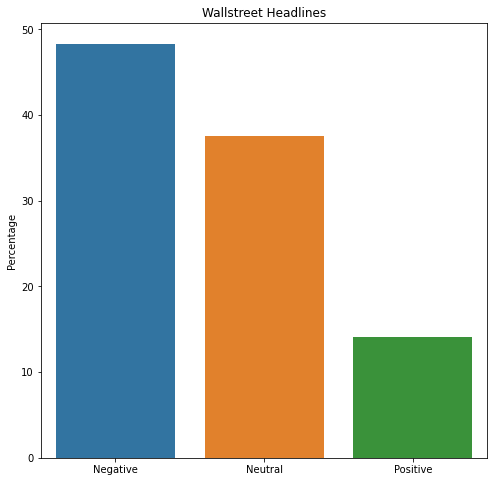

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
 
counts = df_merge_difkey.sent_label.value_counts(normalize=True) * 100
 
sns.barplot(x=counts.index, y=counts, ax=ax)
 
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
 
plt.title("Wallstreet Headlines")
 
plt.show()